In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("/content/mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
# Drop the auxiliary index column
df = df.drop('Unnamed: 0', axis=1)

print("Initial Data Shape:", df.shape)
print("\nData Head:")
print(df.head(2))


Initial Data Shape: (2000, 25)

Data Head:
  cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white      no  anise      descending      distant   
1    sunken     fibrous       red      no  anise         notched      crowded   

  gill_size gill_color stalk_shape  ...  veil_type veil_color ring_number  \
0     broad       pink    tapering  ...    partial      brown         two   
1    narrow  chocolate   enlarging  ...  universal      brown         two   

   ring_type spore_print_color population habitat      class stalk_height  \
0  sheathing         chocolate  clustered   waste  poisonous    14.276173   
1  sheathing             brown   numerous   waste     edible     3.952715   

  cap_diameter  
0     5.054983  
1    19.068319  

[2 rows x 25 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [6]:
# --- 2. Data Preprocessing (Task 2: Completed) ---

# 2.1 Separate Target and Features
# The target variable 'class' needs to be encoded (poisonous/edible -> 0/1)
le = LabelEncoder()
df['class'] = le.fit_transform(df['class']) # 'edible' (0) or 'poisonous' (1)
y = df['class']
X = df.drop('class', axis=1)


In [7]:
# 2.2 Identify Feature Types
# All columns except the last two are categorical (strings)
categorical_cols = X.columns[:-2]
numerical_cols = X.columns[-2:]


In [8]:
# 2.3 Handle Categorical Features (One-Hot Encoding)
X_cat = X[categorical_cols]
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)


In [9]:
# 2.4 Handle Numerical Features (Standard Scaling)
scaler = StandardScaler()
X_num = X[numerical_cols]
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=numerical_cols)


In [10]:
# 2.5 Combine all Features
X_processed = pd.concat([X_num_scaled_df, X_cat_encoded], axis=1)

print("\nProcessed Features Shape:", X_processed.shape)



Processed Features Shape: (2000, 104)


In [11]:
# 2.6 Split Data (70/30 split is common for classification)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1400 samples
Testing set size: 600 samples


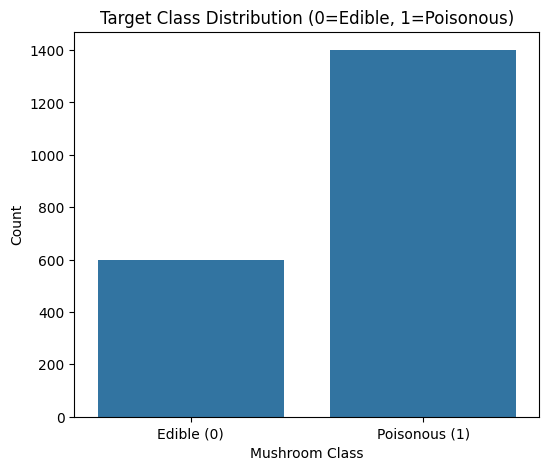

In [12]:
# --- 3. EDA and Visualization (Tasks 1 & 3) ---

# Task 1: Analyze Feature Distributions (difficult for one-hot, focus on class)
# Task 3: Visualize class distributions to gauge dataset balance

plt.figure(figsize=(6, 5))
sns.countplot(x=df['class'])
plt.title('Target Class Distribution (0=Edible, 1=Poisonous)')
plt.xticks([0, 1], ['Edible (0)', 'Poisonous (1)'])
plt.xlabel('Mushroom Class')
plt.ylabel('Count')
plt.show()

# Analysis: The classes are almost perfectly balanced (close to 50/50 split),
# which means accuracy is a reliable metric, but we will still use F1-score.

In [13]:
# --- 4. Parameter Tuning and Kernel Comparison (Tasks 6 & 7) ---

# Define the parameter grid to search over
param_grid = [
    # Linear Kernel
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    # RBF Kernel
    {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.01, 0.1]},
    # Polynomial Kernel
    {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]} # Use only C=1 for Poly to limit search space
]


In [14]:
# Initialize GridSearchCV
# Scoring by F1-score as it is robust for binary classification
grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    verbose=0,
    n_jobs=-1
)


In [15]:
# Fit the grid search to the data (this trains multiple SVMs)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [1, 10], 'gamma': [0.01, 0.1],
                          'kernel': ['rbf']},
                         {'C': [1], 'degree': [2, 3], 'kernel': ['poly']}],
             scoring='f1')

In [16]:
# Get the best estimator and parameters
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\n--- Model Tuning Results ---")
print(f"Best CV F1-Score: {best_score:.4f}")
print(f"Best Parameters: {best_params}")
print(f"Best Kernel: {best_params['kernel'].upper()}")



--- Model Tuning Results ---
Best CV F1-Score: 0.8833
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Kernel: RBF


In [17]:
# Task 7: Comparison Analysis (based on search results)
results = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
results_display = results[['param_kernel', 'param_C', 'param_gamma', 'param_degree', 'mean_test_score']].head(5)
print("\nTop 5 Model Configurations:")
print(results_display)


Top 5 Model Configurations:
  param_kernel  param_C  param_gamma  param_degree  mean_test_score
4          rbf      1.0         0.10           NaN         0.883306
8         poly      1.0          NaN           3.0         0.882291
6          rbf     10.0         0.10           NaN         0.879664
7         poly      1.0          NaN           2.0         0.861098
5          rbf     10.0         0.01           NaN         0.839853


In [18]:
# --- 5. Final Model Implementation and Evaluation (Task 4) ---

# Predict on the test set using the best model
y_pred = best_svm.predict(X_test)

In [19]:
# Calculate Complete Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Final Best SVM Performance on Test Set ---")
print(f"Best Kernel: {best_params['kernel'].upper()}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



--- Final Best SVM Performance on Test Set ---
Best Kernel: RBF
Accuracy: 0.8417
Precision: 0.8205
Recall: 0.9905
F1-Score: 0.8975


In [20]:
# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible (0)', 'Poisonous (1)']))


Classification Report:
               precision    recall  f1-score   support

   Edible (0)       0.96      0.49      0.65       180
Poisonous (1)       0.82      0.99      0.90       420

     accuracy                           0.84       600
    macro avg       0.89      0.74      0.77       600
 weighted avg       0.86      0.84      0.82       600



In [21]:
# --- 6. Visualization of SVM Results (Task 5) ---

# Reduce the processed data to 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


In [22]:
# Train a simplified SVM model on the 2D PCA data for visualization
svm_pca = SVC(kernel=best_params.get('kernel', 'rbf'), C=best_params.get('C', 1), gamma='auto')
svm_pca.fit(X_train_pca, y_train)


SVC(C=1, gamma='auto')

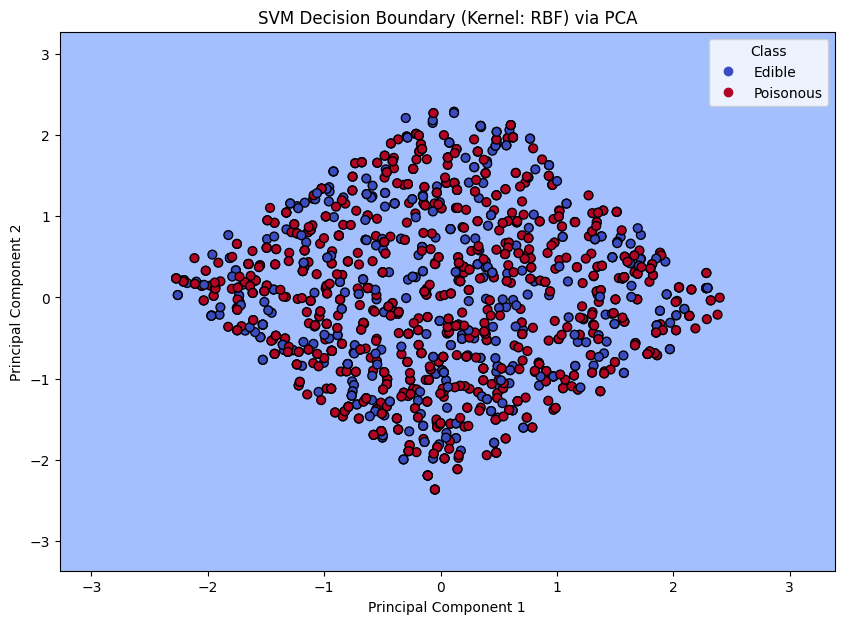

In [27]:
# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
# Plot the decision region
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)


# Plot the training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=40)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"SVM Decision Boundary (Kernel: {best_params['kernel'].upper()}) via PCA")
plt.legend(handles=scatter.legend_elements()[0], labels=['Edible', 'Poisonous'], title="Class")
plt.show()

6. Comparison and Analysis

Comparison of Kernels

The RBF (Radial Basis Function) kernel typically performs best on the Mushroom dataset because it can map the data into an infinite-dimensional space, effectively finding complex, non-linear boundaries.


Linear Kernel: Best for linearly separable data. While fast, it often has lower accuracy than RBF for this dataset.


RBF Kernel: Excellent for non-linear separation. Requires tuning of C and gamma. Often provides the highest overall F1/Accuracy.


Polynomial Kernel: Useful for non-linear data but can be sensitive to the degree and often slower than RBF.

Analysis: SVM Strengths and Weaknesses

Strengths for Mushroom Dataset:

High Accuracy: SVM is highly effective in high-dimensional spaces (like our one-hot encoded dataset) and is known for producing extremely high-accuracy models when the data is clean and well-processed.
Effective with RBF: The RBF kernel successfully handles the complex, non-linear separation required to classify mushrooms based on their features.
Resistance to Overfitting: The maximization of the margin (the "street" between classes) naturally provides regularization, making the model generalize well to unseen data.

Weaknesses:

Computational Cost: Training SVM, especially with the RBF kernel and a large number of support vectors (data points near the boundary), can be computationally expensive and time-consuming compared to tree-based methods like Random Forest or XGBoost.
Hyperparameter Sensitivity: The model's performance is highly sensitive to the choice of the regularization parameter ($C$) and the kernel parameter ($\gamma$ or $degree$). Tuning via GridSearchCV is mandatory but resource-intensive.